### MEC 2403 - Otimização e Algoritmos para Engenharia Mecanica
#### Aluno: Felipe da Costa Pereira (Mestrado)

#### Lista 1: Exercício Matlab

1 – Seja a função $f(x_{1}, x_{2})$ dada por:  

$
f(x_{1}, x_{2}) = x_{1}^3 + 2x_{1}x_{2}^2 - x_{2}^3 -20x_{1}
$

Desenhar o gráfico da curva contida em um plano Cartesiano, cujo eixo das abscissas corresponde à reta que passa pelos pontos $P_{1} = (−0.7, 1.6)$ e $P_{2} = (3.7, −0.4)$ e o eixo das ordenadas corresponde aos valores da função $f$. Utilizar o MATLAB e considerar apenas o trecho entre os pontos $P_{1}$ e $P_{2}$.


___
#### Solução:

Função que avalia $f$ no ponto $x_{0}$

In [150]:
function f_value = f_func(x0)
    f_value = x0(1)^3 + 2*x0(1).*x0(2)^2 - x0(2)^3 -20*x0(1);
end

Dados do problema

In [44]:
x1 = linspace(-2,4,50);
x2 = linspace(-2,2,50);
[x1,x2] = meshgrid(x1,x2);

f = x1.^3 + 2.*x1.*x2.^2 - x2.^3 -20.*x1;

P1 = [-0.7 1.6];
P2 = [3.7 -0.4];

Plotando $f$, $P_{1}$, $P_{2}$ e o segmento $P_{1}P_{2}$

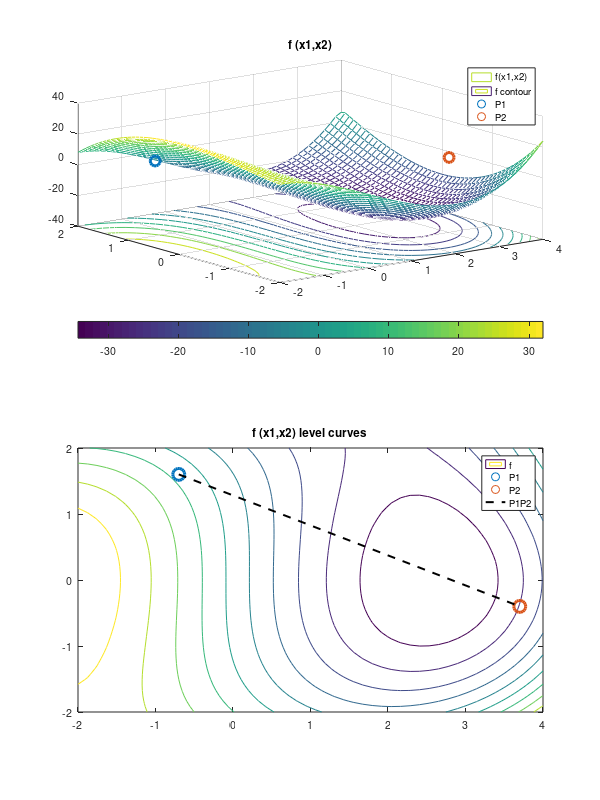

In [135]:
set(gcf,'Position',[0 0 600 800])

% mesh with contours
subplot(2,1,1), meshc(x1,x2,f), title('f (x1,x2)');
hold on
plot3(P1(1), P1(2), 'o', 'LineWidth', 3, 'MarkerSize', 10);
plot3(P2(1), P2(2), 'o', 'LineWidth', 3, 'MarkerSize', 10);
legend('f(x1,x2)', 'f contour', 'P1', 'P2');
colorbar('southoutside')

subplot(2,1,2);
contour(x1,x2,f);
title('f (x1,x2) level curves');
hold on
plot(P1(1),P1(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot(P2(1),P2(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot ([P1(1);P2(1)], [P1(2);P2(2)], 'k--', 'LineWidth', 2)
legend('f', 'P1', 'P2', 'P1P2');

Número de divisões do segmento $ P_{1}P_{2}$

In [141]:
n = 10;

Vetor $\vec{d}$

In [142]:
d = P2-P1

d =

   4.4000  -2.0000



Cálculo de $\alpha$ e $f(\alpha)$

In [143]:
% inicialização
alpha = 0;
alpha_max = norm(d);
alphas = [];
fs = [];

while alpha <= alpha_max    % critério de parada: chegou em P2?
    % calcula x
    x = P1 + alpha * d/alpha_max;
        
    % calcula f(x), utilizando a funcao f definida anteiormente
    fs(end+1) = f_func(x);

    % salva alpha
    alphas (end+1) = alpha;

    % atualiza alpha
    alpha += alpha_max/n;
end

Valores de $f$ nos pontos:
- $\alpha = 0$ (Ponto $P_{1}$)
- $\alpha = \alpha_{max}$ (Ponto $P_{2}$) 

... e valor mínimo de $f$

In [149]:
fprintf('f(alpha=%i) = %i  (Ponto P1) \n', alphas(1), fs(1))
fprintf('f(alpha=%i) = %i  (Ponto P2) \n', alphas(end), fs(end))
fprintf('fmin = %i \n', min(fs))

f(alpha=0) = 5.977  (Ponto P1) 
f(alpha=4.83322) = -22.099  (Ponto P2) 
fmin = -33.9742 


Plotando $f(\alpha)$

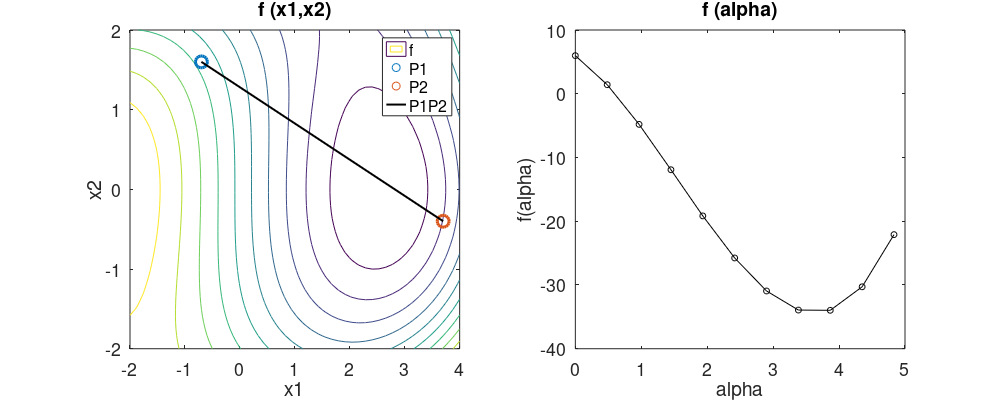

In [148]:
set(gcf,'Position',[0 0 1000 400])

subplot(1,2,1), contour(x1,x2,f), title('f (x1,x2)'), xlabel ('x1'), ylabel ('x2')
hold on
plot(P1(1),P1(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot(P2(1),P2(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot ([P1(1);P2(1)], [P1(2);P2(2)], 'k-', 'LineWidth', 2)
legend('f', 'P1', 'P2', 'P1P2');

subplot(1,2,2), plot(alphas, fs, 'k-o'), xlabel ('alpha'), ylabel ('f(alpha)'), title('f (alpha)')